<a href="https://colab.research.google.com/github/arruenicol/challenge_telecom_x/blob/main/challenge_telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Extracción**

In [1]:
import requests
import pandas as pd
import json
import numpy as np

url = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

data = json.loads(url.text)

df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# **🔧 Transformación**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
# Verificar si hay valores únicos en cada columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [4]:
# verificar si existen valores nulos
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [5]:
# verificar existencia de duplicados
print("Num de duplicados", df.duplicated().sum())

Num de duplicados 0


In [6]:
# verificar registros vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [8]:
df = df[df['Churn'].str.strip() != '']
# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
df['account.Contract'] = df['account.Contract'].str.replace(r'\-', ' ', regex=True).str.strip()


/tmp/ipython-input-624481306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Contract'] = df['account.Contract'].str.replace(r'\-', ' ', regex=True).str.strip()


In [10]:
#renombrando columnas
df.rename(columns={
    'customerID': 'ID Cliente',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Ciudadano_Senior',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Trabajados',
    'phone.PhoneService': 'Servicio_Telefónico',
    'phone.MultipleLines': 'Líneas_Múltiples',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Protección_Dispositivo',
    'internet.TechSupport': 'Soporte Técnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Películas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Electrónica',
    'account.PaymentMethod': 'Método_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales',
    'Churn': 'Abandono'
}, inplace=True)

df.head()

/tmp/ipython-input-272218745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


,ID Cliente,Abandono,Género,Ciudadano_Senior,Tiene_Pareja,Dependientes,Meses_Trabajados,Servicio_Telefónico,Líneas_Múltiples,Servicio_Internet,...,Respaldo_Online,Protección_Dispositivo,Soporte Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Cliente              7043 non-null   object 
 1   Abandono                7043 non-null   object 
 2   Género                  7043 non-null   object 
 3   Ciudadano_Senior        7043 non-null   int64  
 4   Tiene_Pareja            7043 non-null   object 
 5   Dependientes            7043 non-null   object 
 6   Meses_Trabajados        7043 non-null   int64  
 7   Servicio_Telefónico     7043 non-null   object 
 8   Líneas_Múltiples        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Respaldo_Online         7043 non-null   object 
 12  Protección_Dispositivo  7043 non-null   object 
 13  Soporte Técnico         7043 non-null   object 
 14  TV_Streaming            7043 non-null   objec

In [17]:
df.to_csv('df_final.csv', index=False)

# **📊 Carga y análisis**

In [12]:
# creación columna cuentas diarias

df['Cuentas_Diarias'] = df['Cargos_Mensuales'] / 30
df[['Cargos_Mensuales', 'Cuentas_Diarias']].sample(5)

/tmp/ipython-input-1075784887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['Cargos_Mensuales'] / 30


,Cargos_Mensuales,Cuentas_Diarias
3570,84.50,2.816667
4334,83.55,2.785000
1090,99.70,3.323333
3326,79.40,2.646667
5414,93.60,3.120000


In [13]:
# análisis descriptivo
df.describe()

,Ciudadano_Senior,Meses_Trabajados,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## **Distribución de Evasión**

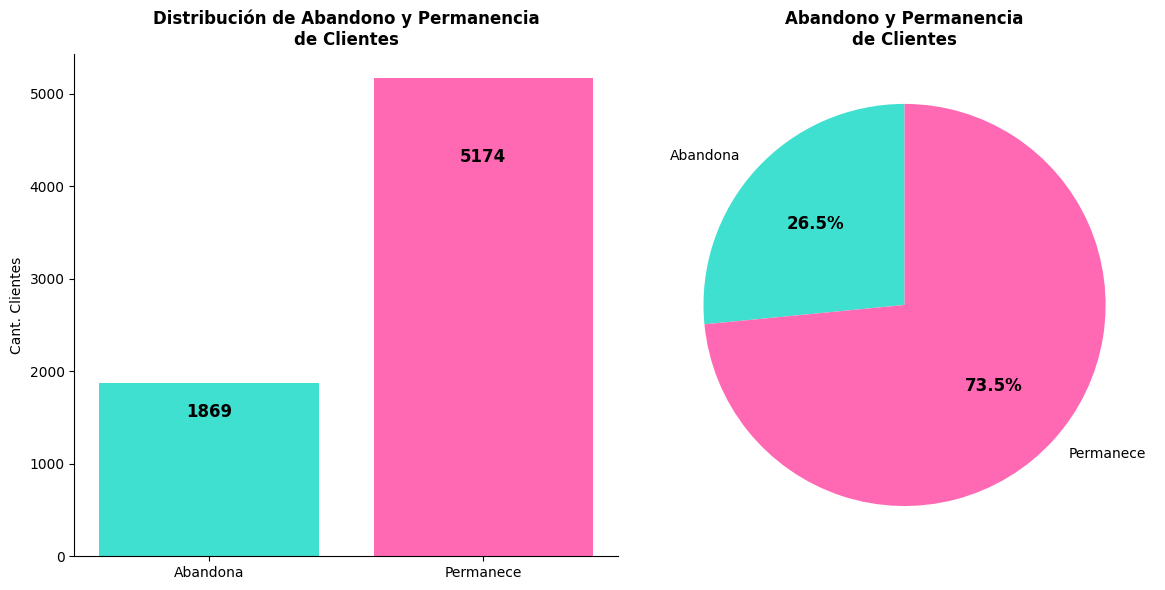

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colores consistentes
colors = ['#40E0D0', '#FF69B4']  # turquesa y rosado

churn_counts = df['Abandono'].map({'Yes':'Abandona', 'No':'Permanece'}).value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Barras
bars = axs[0].bar(churn_counts.index, churn_counts.values, color=colors)
axs[0].set_title('Distribución de Abandono y Permanencia\nde Clientes', fontsize=12, weight='bold')
axs[0].set_ylabel('Cant. Clientes')

# Números dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height/1.2, f'{height:.0f}', ha='center', va='center', fontweight='bold', fontsize=12)

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(False)

# Pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Abandono y Permanencia\nde Clientes', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

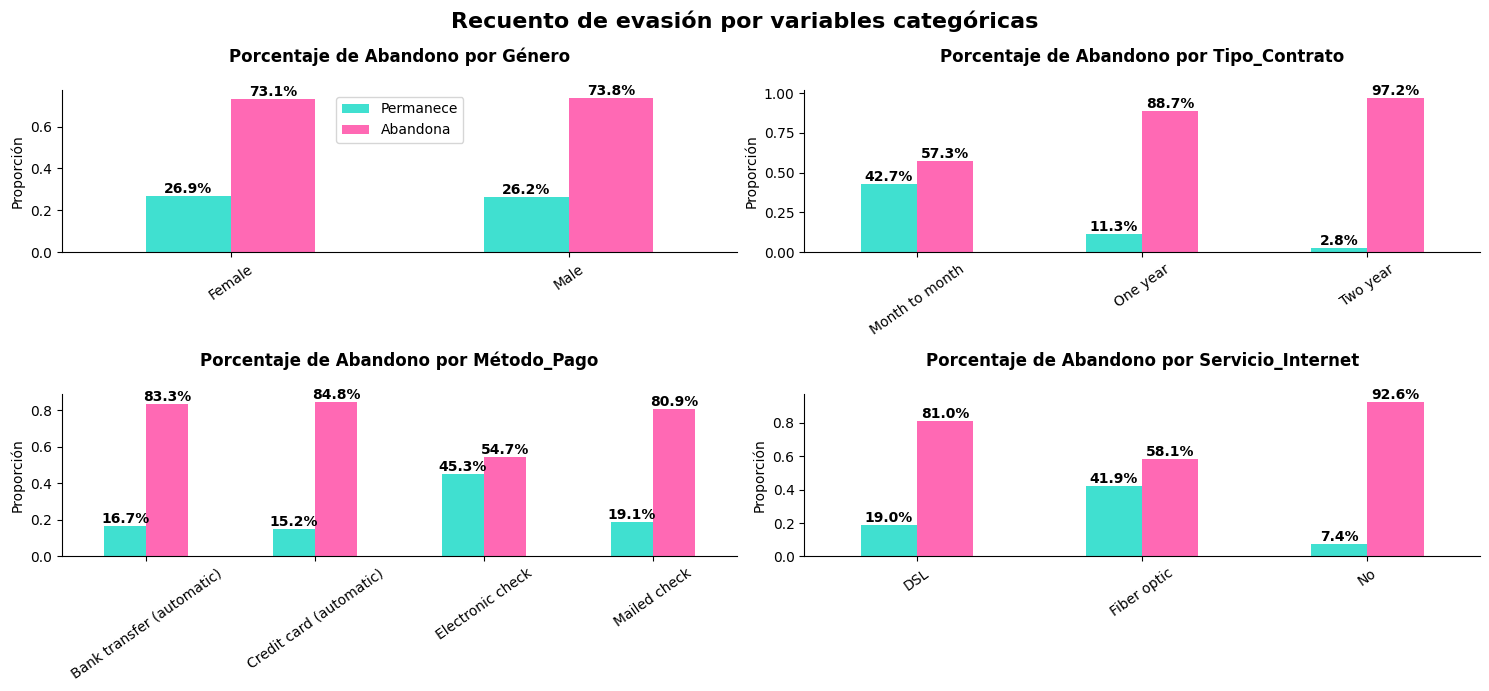

In [15]:
# Variables categóricas
categoricas = ['Género', 'Tipo_Contrato', 'Método_Pago', 'Servicio_Internet']
colors = ['#40E0D0', '#FF69B4']  # turquesa y rosado

# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(15, 7))
axes = axes.flatten()

for i, cat in enumerate(categoricas):
    # Tabla cruzada con proporciones
    cruzado = pd.crosstab(df[cat], df['Abandono'].map({'Yes':'Abandona','No':'Permanece'}), normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors, legend=False)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}', fontsize=12, weight='bold', pad=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].tick_params(axis='x', rotation=35)

    # Números sobre las barras
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].annotate(f'{height*100:.1f}%',
                             (p.get_x() + p.get_width()/2, height),
                             ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Limpiar bordes
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Leyenda común
axes[0].legend(['Permanece', 'Abandona'], loc='upper center')

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')
plt.tight_layout()
plt.show()


/tmp/ipython-input-672754800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['Abandono'].map({'Yes':'Abandona', 'No':'Permanece'}), y=var, palette=colors)


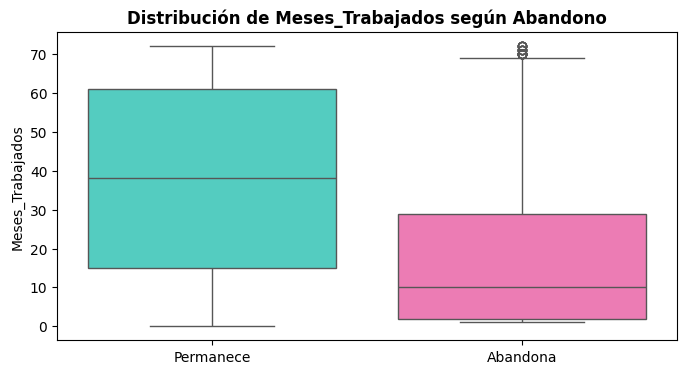

/tmp/ipython-input-672754800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['Abandono'].map({'Yes':'Abandona', 'No':'Permanece'}), y=var, palette=colors)


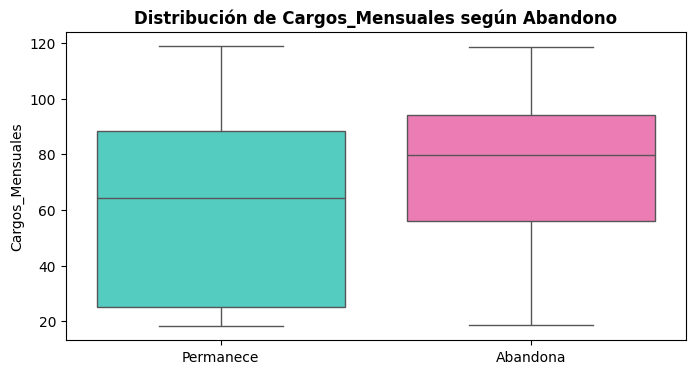

/tmp/ipython-input-672754800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['Abandono'].map({'Yes':'Abandona', 'No':'Permanece'}), y=var, palette=colors)


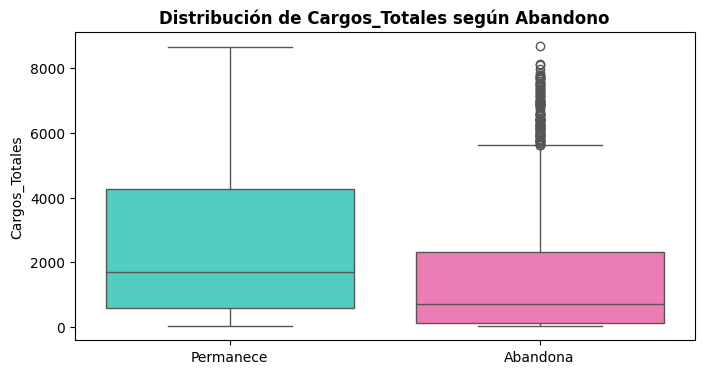

In [16]:
numerical_vars = ['Meses_Trabajados', 'Cargos_Mensuales', 'Cargos_Totales']

for var in numerical_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=df['Abandono'].map({'Yes':'Abandona', 'No':'Permanece'}), y=var, palette=colors)
    plt.title(f'Distribución de {var} según Abandono', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel(var)
    plt.show()

# **📄Informe final**